# Prediction of Toyota Corolla 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('ToyotaCorolla.csv',encoding= 'unicode_escape')
df

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [5]:
df.shape

(1436, 38)

In [6]:
df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [7]:
df.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df1= df.drop(['Id', 'Model',  'Mfg_Month', 'Mfg_Year', 
       'Fuel_Type',  'Met_Color', 'Color', 'Automatic',  
       'Cylinders',   'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'], axis =1)

# 

In [10]:
df1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [11]:
df1.shape

(1436, 9)

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
Price            1436 non-null int64
Age_08_04        1436 non-null int64
KM               1436 non-null int64
HP               1436 non-null int64
cc               1436 non-null int64
Doors            1436 non-null int64
Gears            1436 non-null int64
Quarterly_Tax    1436 non-null int64
Weight           1436 non-null int64
dtypes: int64(9)
memory usage: 101.1 KB


<IPython.core.display.Javascript object>

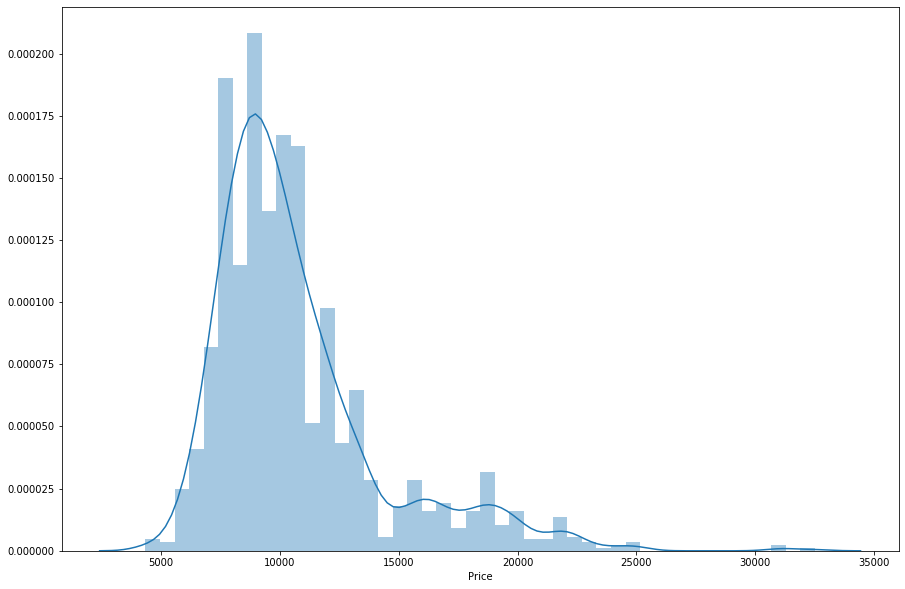

In [14]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df1['Price'])

In [15]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [20]:
X = df1.iloc[:,df1.columns != 'Price']
Y = df1.iloc[:, 0]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state= 0)

In [21]:
toyota = linear_model.LinearRegression()
toyota.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
coeff_df = pd.DataFrame(toyota.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

               Coefficient
Age_08_04      -121.138340
KM               -0.018401
HP               33.229416
cc               -2.002937
Doors           -28.196746
Gears           609.551830
Quarterly_Tax     7.279838
Weight           20.416253


In [23]:
y_pred = toyota.predict(X_test)

In [25]:
df_tot = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df_tot.head(20)

,Actual,Predicted
651,7950,8289.009898
411,10950,10517.002275
342,14950,13010.622495
1298,7500,7666.595660
483,9900,10486.851572
1017,8900,9543.837614
1063,6950,6140.543097
31,15750,16218.434619
467,11950,11289.503201
477,9930,10499.559565


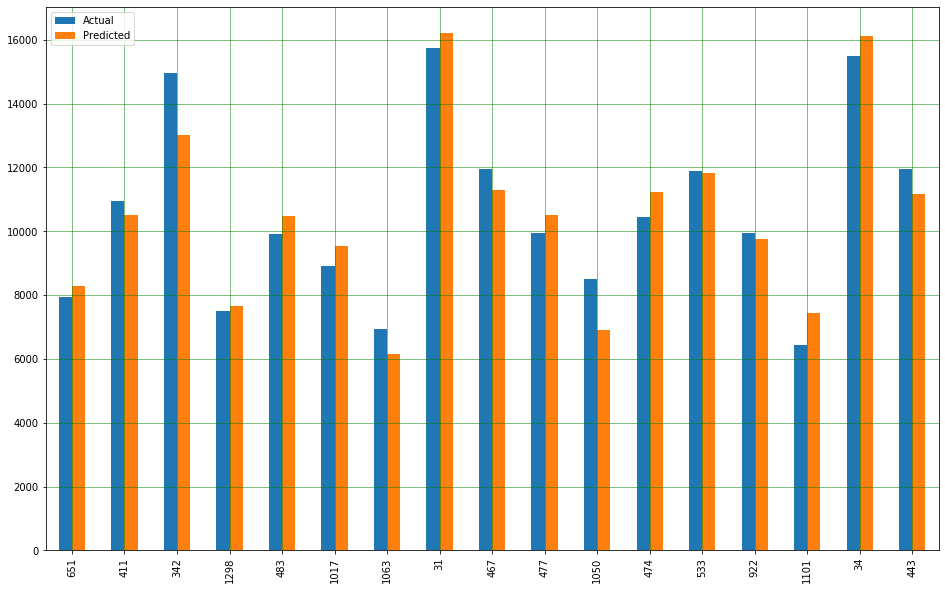

In [26]:
df_tot.head(17).plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [28]:
# Root Mean Squared Deviation
rmsd = np.sqrt(mean_squared_error(Y_test, y_pred))      
r2_value = r2_score(Y_test, y_pred) 
print("Intercept: \n", toyota.intercept_)
print("Root Mean Square Error \n", rmsd)
print("R^2 Value: \n", r2_value)


Intercept: 
 -6927.799788506036
Root Mean Square Error 
 2232.1316385484915
R^2 Value: 
 0.5995582859225164


In [ ]:
#  Here the R² value is 0.59955, which shows the model is almost accurate and can make good predictions. 
# R² value can range from 0 to 1. As the R² value is not  close to 1, the model will not make better predictions.
# We will identfy which features are not perform well and eliminate from computations

In [30]:
# Beta0 has x0=1. Add a column of for the the first term of the #MultiLinear Regression equation.
# import statsmodels.formula.api as sm
import statsmodels.regression.linear_model as sm1
#The 0th column contains only 1 in each 50 rows
X= np.append(arr = np.ones((1436,1)).astype(int), values = X, axis=1) 
X_opt= X[:, [1,2,3,4,5,6,7,8]]
#Optimal X contains the highly impacted independent variables
#OLS: Oridnary Least Square Class. endog is the dependent variable,
#exog is the number of observations
regressor_OLS=sm1.OLS(endog = Y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          1.247e+04
Date:                Mon, 09 Mar 2020   Prob (F-statistic):                        0.00
Time:                        20:33:37   Log-Likelihood:                         -12383.
No. Observations:                1436   AIC:                                  2.478e+04
Df Residuals:                    1428   BIC:                                  2.482e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -125.4510      2.445    -51.303      0.000    -130.248    -120.654
x2            -0.0205      0.001    -16.305      0.000      -0.023      -0.018
x3            33.4737      2.796     11.973      0.000      27.990      38.958
x4            -0.1032      0.090     -1.141      0.254      -0.281       0.074
x5            -7.2494     40.184     -0.180      0.857     -86.075      71.576
x6            78.3780    148.258      0.529      0.597    -212.449     369.205
x7             5.8258      1.227      4.748      0.000       3.419       8.233
x8            14.0322      0.773     18.157      0.000      12.516      15.548
==============================================================================
Omnibus:                      108.641   Durbin-Watson:                   1.509
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              562.996
Skew:                           0.019   Prob(JB):                    5.59e-123
Kurtosis:                       6.067   Cond. No.                     3.26e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
# Beta0 has x0=1. Add a column of for the the first term of the 
# MultiLinear Regression equation.
# import statsmodels.formula.api as sm
import statsmodels.regression.linear_model as sm1
#The 0th column contains only 1 in each 50 rows
X= np.append(arr = np.ones((1436,1)).astype(int), values = X, axis=1) 
X_opt= X[:, [2,3,4,5,6,7,8]]
#Optimal X contains the highly impacted independent variables
#OLS: Oridnary Least Square Class. endog is the dependent variable,
#exog is the number of observations
regressor_OLS=sm1.OLS(endog = Y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     2039.
Date:                Mon, 09 Mar 2020   Prob (F-statistic):               0.00
Time:                        20:40:49   Log-Likelihood:                -12613.
No. Observations:                1436   AIC:                         2.523e+04
Df Residuals:                    1432   BIC:                         2.526e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4112.5472     87.929     46.771      0.000    3940.063    4285.031
x1          4112.5472     87.929     46.771      0.000    3940.063    4285.031
x2          4112.5472     87.929     46.771      0.000    3940.063    4285.031
x3          4112.5472     87.929     46.771      0.000    3940.063    4285.031
x4          -154.6263      2.602    -59.432      0.000    -159.730    -149.523
x5            -0.0115      0.001     -8.480      0.000      -0.014      -0.009
x6            36.6205      2.956     12.388      0.000      30.822      42.419
==============================================================================
Omnibus:                      417.364   Durbin-Watson:                   1.350
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3000.238
Skew:                           1.157   Prob(JB):                         0.00
Kurtosis:                       9.693   Cond. No.                     1.19e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.14e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [37]:
# Beta0 has x0=1. Add a column of for the the first term of the #MultiLinear Regression equation.
# import statsmodels.formula.api as sm
import statsmodels.regression.linear_model as sm1
#The 0th column contains only 1 in each 50 rows
X= np.append(arr = np.ones((1436,1)).astype(int), values = X, axis=1) 
X_opt= X[:, [1,2,3,4,5,7]]
#Optimal X contains the highly impacted independent variables
#OLS: Oridnary Least Square Class. endog is the dependent variable,
#exog is the number of observations
regressor_OLS=sm1.OLS(endog = Y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     4758.
Date:                Mon, 09 Mar 2020   Prob (F-statistic):               0.00
Time:                        20:41:02   Log-Likelihood:                -12756.
No. Observations:                1436   AIC:                         2.552e+04
Df Residuals:                    1434   BIC:                         2.553e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4058.8117     29.219    138.908      0.000    4001.494    4116.129
x1          4058.8117     29.219    138.908      0.000    4001.494    4116.129
x2          4058.8117     29.219    138.908      0.000    4001.494    4116.129
x3          4058.8117     29.219    138.908      0.000    4001.494    4116.129
x4          4058.8117     29.219    138.908      0.000    4001.494    4116.129
x5          -170.9336      2.478    -68.978      0.000    -175.795    -166.073
==============================================================================
Omnibus:                      359.275   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2774.226
Skew:                           0.946   Prob(JB):                         0.00
Kurtosis:                       9.541   Cond. No.                     4.83e+34
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.14e-63. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [33]:
# Beta0 has x0=1. Add a column of for the the first term of the #MultiLinear Regression equation.
# import statsmodels.formula.api as sm
import statsmodels.regression.linear_model as sm1
#The 0th column contains only 1 in each 50 rows
X= np.append(arr = np.ones((1436,1)).astype(int), values = X, axis=1) 
X_opt= X[:, [1,2,4,5,7,8]]
#Optimal X contains the highly impacted independent variables
#OLS: Oridnary Least Square Class. endog is the dependent variable,
#exog is the number of observations
regressor_OLS=sm1.OLS(endog = Y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     1413.
Date:                Mon, 09 Mar 2020   Prob (F-statistic):               0.00
Time:                        20:39:08   Log-Likelihood:                -12658.
No. Observations:                1436   AIC:                         2.533e+04
Df Residuals:                    1431   BIC:                         2.535e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9268.2967    147.049     63.029      0.000    8979.843    9556.751
x1          9268.2967    147.049     63.029      0.000    8979.843    9556.751
x2          -149.5425      2.754    -54.300      0.000    -154.945    -144.140
x3            -0.0181      0.001    -13.338      0.000      -0.021      -0.015
x4             0.5605      0.104      5.397      0.000       0.357       0.764
x5           226.7147     45.866      4.943      0.000     136.743     316.686
==============================================================================
Omnibus:                      435.694   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3403.899
Skew:                           1.191   Prob(JB):                         0.00
Kurtosis:                      10.157   Cond. No.                     1.66e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.18e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [38]:
# Beta0 has x0=1. Add a column of for the the first term of the #MultiLinear Regression equation.
# import statsmodels.formula.api as sm
import statsmodels.regression.linear_model as sm1
#The 0th column contains only 1 in each 50 rows
X= np.append(arr = np.ones((1436,1)).astype(int), values = X, axis=1) 
X_opt= X[:, [2,3,4,5,7,8]]
#Optimal X contains the highly impacted independent variables
#OLS: Oridnary Least Square Class. endog is the dependent variable,
#exog is the number of observations
regressor_OLS=sm1.OLS(endog = Y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     4758.
Date:                Mon, 09 Mar 2020   Prob (F-statistic):               0.00
Time:                        20:41:27   Log-Likelihood:                -12756.
No. Observations:                1436   AIC:                         2.552e+04
Df Residuals:                    1434   BIC:                         2.553e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4058.8117     29.219    138.908      0.000    4001.494    4116.129
x1          4058.8117     29.219    138.908      0.000    4001.494    4116.129
x2          4058.8117     29.219    138.908      0.000    4001.494    4116.129
x3          4058.8117     29.219    138.908      0.000    4001.494    4116.129
x4          4058.8117     29.219    138.908      0.000    4001.494    4116.129
x5          -170.9336      2.478    -68.978      0.000    -175.795    -166.073
==============================================================================
Omnibus:                      359.275   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2774.226
Skew:                           0.946   Prob(JB):                         0.00
Kurtosis:                       9.541   Cond. No.                     4.83e+34
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.14e-63. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
# The highest impact variable is Gears , HP and Weights are impact on price of Toyaota Car ...